In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data=pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Data PreProcessing

#find the number of missing values in each column in the training data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#find the number of missing values in each column in the testing data

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#Forward fill Imputation (forward fill involves replacing the missing value with the most recent known (non-missing)
#value in the same column)

train_data = train_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

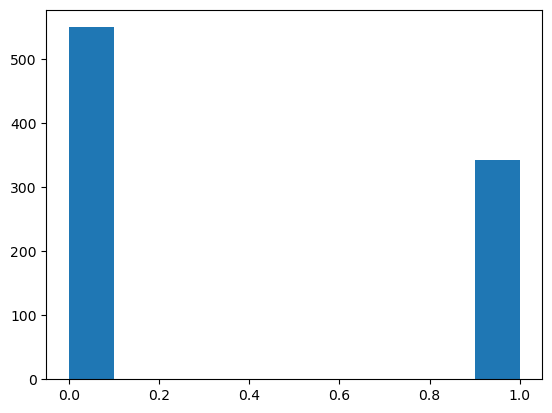

In [7]:
plt.hist(train_data['Survived'])

In [8]:
important_features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

x = pd.get_dummies(train_data[important_features])
y = train_data["Survived"]


# Create a pipeline with SMOTE oversampling, Random Forest
model_with_smote = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=10, 
                                      min_samples_split=5,
                                      min_samples_leaf=2,
                                      min_weight_fraction_leaf=0.0, max_features = 'log2', #same as making it auto
                                      max_leaf_nodes=20, min_impurity_decrease=0.0, bootstrap=True,
                                      oob_score=True, n_jobs=1, random_state=42) )
])

# Perform cross-validation
cv_scores = cross_val_score(model_with_smote, x, y, cv=4, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

model_with_smote.fit(x,y) #trained the classifier on the training data using the fit method.

x_test = pd.get_dummies(test_data[important_features])
predictions = model_with_smote.predict(x_test) #made predictions on the test data using the predict method

#Make a csv file containing two columns: PassengerId and Survived (contain binary predictions: 1 for survived, 0 for deceased)
output=pd.DataFrame({"PassengerId":test_data.PassengerId,"Survived":predictions})
output.to_csv("Submission.csv",index=False)
print("Submission is successfully saved")

Cross-validation scores: [0.8161435  0.84753363 0.79820628 0.81981982]
Mean accuracy: 0.8204258069728922
Submission is successfully saved
